# 1.1 Linear Models
## Ordinary Least Squares

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import math, datetime, pickle, random, warnings
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import preprocessing, neighbors
from statistics import mean

Coefficients:
 [938.23786125]
Intercept:
 152.91886182616167
Mean square error: 2548.07


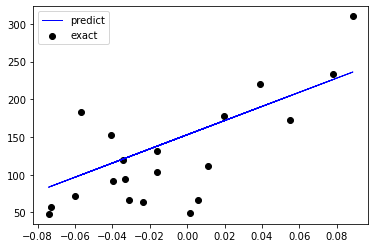

In [2]:
# load the diabets dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_x1 = diabetes_X[:, np.newaxis, 2] # newaxis to change 1 array to 2 arrays

def TrainData(diabetes_X, diabetes_y):
    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train  = diabetes_y[:-20]
    diabetes_y_test = diabetes_y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Trian the model using the traing sets
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)

    # The coefficients
    print('Coefficients:\n', regr.coef_)
    # The coefficients
    print('Intercept:\n', regr.intercept_)
    # The mean square error
    print('Mean square error: %.2f'
         % mean_squared_error(diabetes_y_test, diabetes_y_pred))
    return diabetes_X_test, diabetes_y_test, diabetes_y_pred

diabetes_X_test, diabetes_y_test, diabetes_y_pred = TrainData(diabetes_x1, diabetes_y)
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black',label='exact')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue', linewidth = 1, label='predict')
plt.legend(loc="upper left")

plt.show()

In [3]:
diabetes_x2 = diabetes_X[:, 2:5]
diabetes_X_test, diabetes_y_test, diabetes_y_pred = TrainData(diabetes_x2, diabetes_y)

Coefficients:
 [770.91913228 400.70644175  53.99579803]
Intercept:
 152.89941462560384
Mean square error: 2582.11


## Case Study: Stock Price

In [4]:
df_stock = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Product_Studio/master/AMAZON%20_stock.csv')
df_stock = df_stock.set_index('Date')
forecast_col = 'Adj Close'
df_stock.fillna(-99999,inplace = True)

forecast_out = int(math.ceil(0.01*len(df_stock)))
df_stock['label'] = df_stock[forecast_col].shift(-forecast_out)

X = np.array(df_stock.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df_stock.dropna(inplace = True)
y = np.array(df_stock['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

clf = linear_model.LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
# save classifier, do not need to retrain it every time
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)

pickle_in  = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print('forecast_set {}\n forecast_days {}\n accuracy {}'.format(forecast_set,forecast_out,accuracy))




forecast_set [1650.83700136 1682.23453053 1707.6895311  1708.15715389 1714.20915574
 1666.96110275 1651.01798607 1663.31039835 1687.57559906 1642.71335218
 1628.1210573  1686.69523006 1732.35964208]
 forecast_days 13
 accuracy 0.9814839519880566


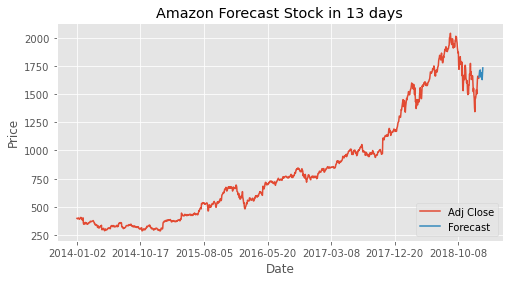

In [5]:
style.use('ggplot')
df_stock['Forecast'] = np.nan 
last_date = df_stock.iloc[-1].name # index, which is date
last_date = datetime.datetime.strptime(last_date, "%Y-%m-%d")
last_unix = last_date.timestamp()
one_more_day = 86400 #sec
next_unix = last_unix +one_more_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_more_day
    df_stock.loc[next_date] = [np.nan for _ in range(len(df_stock.columns)-1)] + [i]
    
df_stock[forecast_col].plot(figsize = (8,4),title = 'Amazon Forecast Stock in 13 days')
df_stock.Forecast.plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Break Down Linear Regression
__Slope formula:__
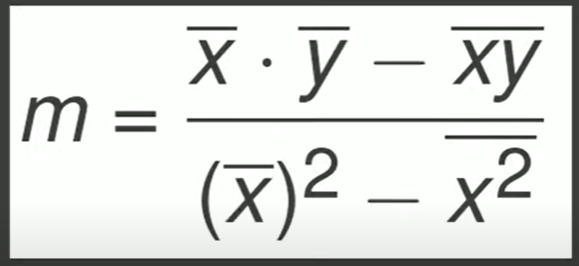

__Intercept formula:__
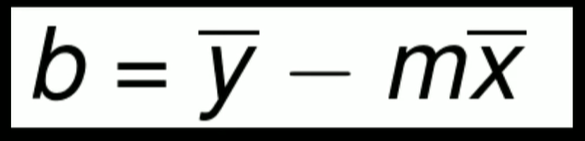

__Squared error formula: (bigger means error is lower)__
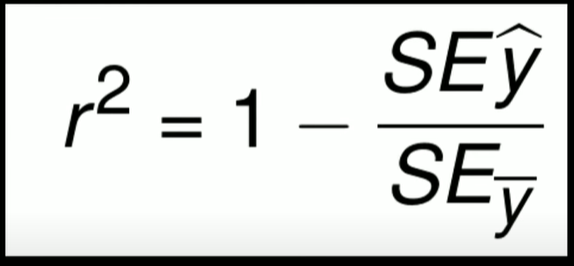

https://www.youtube.com/watch?v=QUyAFokOmow&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=11

In [6]:
random.randrange(-40, 40)

32

0.9469476725573014


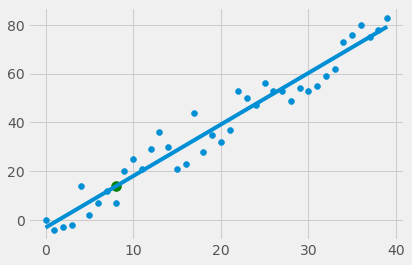

In [7]:
style.use('fivethirtyeight')

# xs = np.array([1,2,3,4,5,6], dtype = np.float64)
# ys = np.array([5,4,6,5,6,7], dtype = np.float64)
def create_dataset(num_data, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(num_data):
        #returns a number between -variance (included) and variance (not included)
        y = val + random.randrange(-variance, variance) 
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

def best_fit_slope_and_intercept(xs, ys):
    m = ((mean(xs) * mean(ys)) - mean(xs*ys)) / ((mean(xs)**2 - mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m,b

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

xs, ys = create_dataset(40, 10, correlation = 'pos')
m,b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,s = 100,color = 'g')
plt.plot(xs, regression_line)
plt.show()
